<font color="#CA0032"><h1 align="left">**Redes neuronales shallow (no profundas)**</h1></font>

<font color="#6E6E6E"><h1 align="left">**Autoencoder para caracteres manuscritos (OCR)**</h1></font>

<h2 align="left">Manuel Sánchez-Montañés</h2>

<font color="#6E6E6E"><h2 align="left">manuel.smontanes@gmail.com</h2></font>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPRegressor
import numpy as np

%matplotlib inline

# **Carga de datos**

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255. # reescalado de datos para que vayan de 0 a 1
y = y.astype(int) # las etiquetas leídas son de tipo str: las convertimos a int

X = X[y<=2] # para que vaya más rápido el entrenamiento trabajamos sólo con los dígitos 0,1,2
y = y[y<=2]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(21770, 784)
<class 'pandas.core.series.Series'>
(21770,)


In [4]:
from sklearn.model_selection import train_test_split

X_train_aux, X_test, y_train_aux, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=1)

print(X_train_aux.shape)
print(y_train_aux.shape)
print(X_test.shape)
print(y_test.shape)

xmin = X.min()
xmax = X.max()

print(xmin)
print(xmax)

(16327, 784)
(16327,)
(5443, 784)
(5443,)
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64


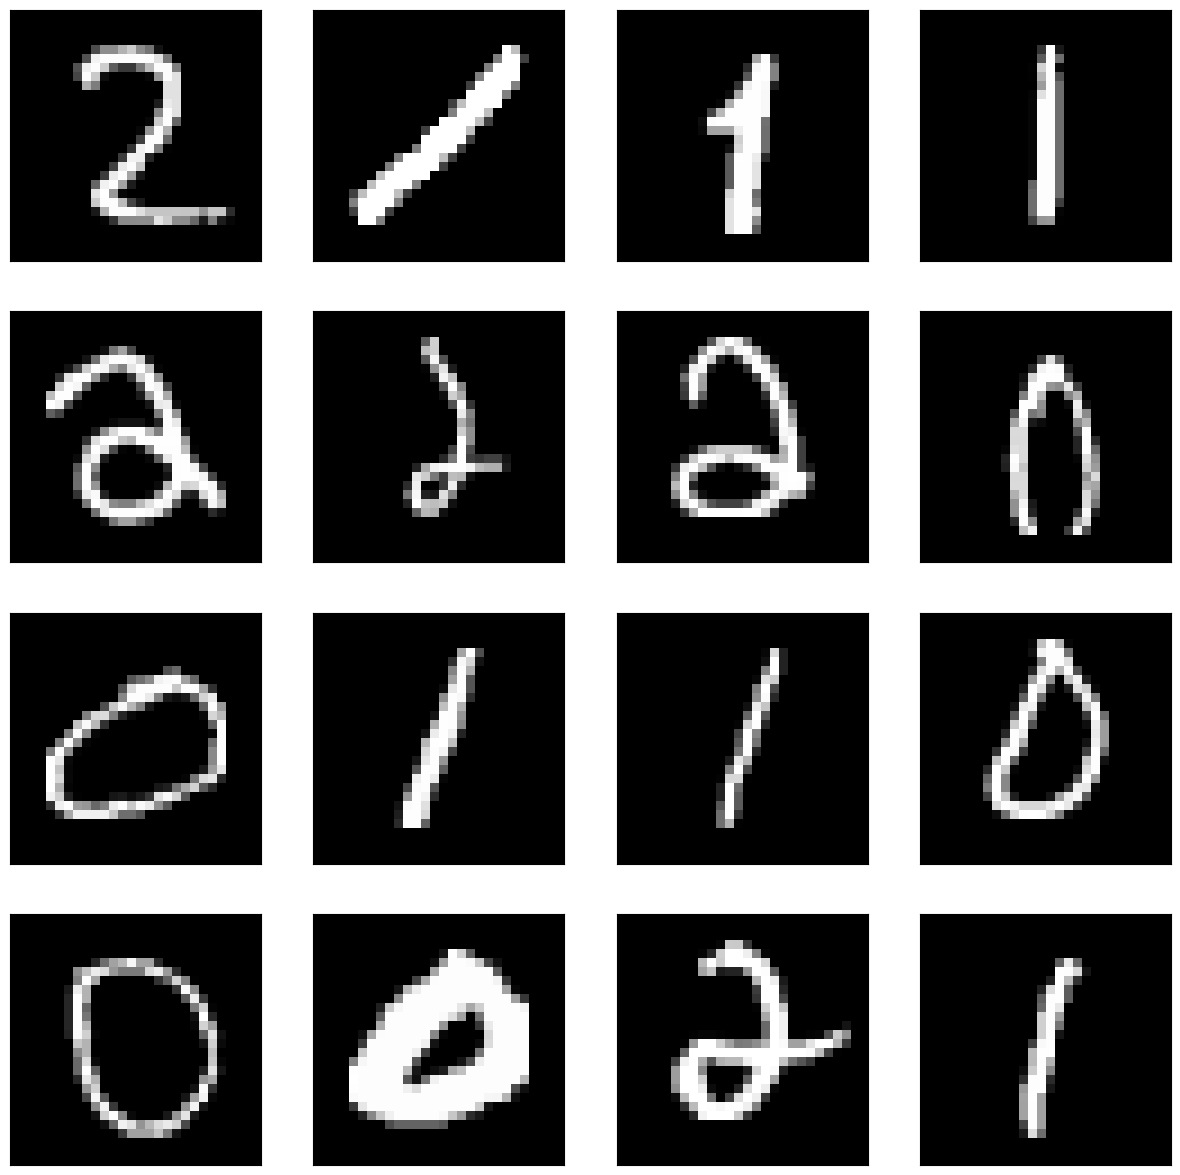

In [5]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
primero = 5000
for i in range(16):
    ax = axes.ravel()[i]
    ax.matshow(X_train_aux[primero+500*i].reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# **Construcción del modelo**

In [18]:
n_hidden = 50

In [19]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_aux, y_train_aux,
                                            test_size=0.25, random_state=15)

mlp = MLPRegressor(hidden_layer_sizes=(n_hidden,), max_iter=1, alpha=1e-4,
                   batch_size=64, #X_tr.shape[0],
                   solver='sgd', verbose=10, tol=1e-4, random_state=1,
                   warm_start=True, validation_fraction=0)

acum_tr_loss  = []
acum_val_loss = []

In [20]:
mlp

MLPRegressor(batch_size=64, hidden_layer_sizes=(50,), max_iter=1,
             random_state=1, solver='sgd', validation_fraction=0, verbose=10,
             warm_start=True)

In [30]:
from sklearn.metrics import mean_squared_error as mse

n_epocas = 40
for epoca in range(n_epocas):
    mlp.fit(X_tr, X_tr)
    #acum_tr_loss.append(((mlp.predict(X_tr) - X_tr)**2).mean())    # Error cuadrático medio en X_tr
    #acum_val_loss.append(((mlp.predict(X_val) - X_val)**2).mean()) # Error cuadrático medio en X_val
    acum_tr_loss.append(mse(X_tr, mlp.predict(X_tr)))    # Error cuadrático medio en X_tr
    acum_val_loss.append(mse(X_val, mlp.predict(X_val))) # Error cuadrático medio en X_val

Iteration 21, loss = 0.00827490
Iteration 22, loss = 0.00818842
Iteration 23, loss = 0.00810137
Iteration 24, loss = 0.00801580
Iteration 25, loss = 0.00793586
Iteration 26, loss = 0.00786310
Iteration 27, loss = 0.00779924
Iteration 28, loss = 0.00774446
Iteration 29, loss = 0.00769686
Iteration 30, loss = 0.00765467
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 31, loss = 0.00761665
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 32, loss = 0.00758129
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 33, loss = 0.00754695
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 34, loss = 0.00751319
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 35, loss = 0.00747989
Training loss did not improve more than tol=0.000100 for 10 consecutiv

# **Análisis del modelo construido**

In [31]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

def grafica_entrenamiento(tr_loss, val_loss, titulo):

    ax=plt.figure(figsize=(10,4)).gca()
    plt.plot(1+np.arange(len(tr_loss)), np.array(tr_loss))
    plt.title(titulo, fontsize=18)
    plt.xlabel('época', fontsize=18)
    if val_loss is not None:
        plt.plot(1+np.arange(len(val_loss)), np.array(val_loss))
        plt.legend(['entrenamiento', 'validación'], loc='upper left')
    else:
        plt.legend(['entrenamiento'], loc='upper left')
        
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [32]:
def info_mlp(mlp):
    coefs = mlp.coefs_
    n_capas_ocultas = len(coefs)-1
    n_parametros = 0
    
    print("Arquitectura: %d capas ocultas + 1 capa de salida" % n_capas_ocultas)
    print("Función de activación en capas ocultas:", mlp.activation)
    
    for i in range(n_capas_ocultas):
        print("capa oculta %d: %d neuronas" % (i, coefs[i].shape[1]))
        n_parametros += coefs[i].shape[0]*coefs[i].shape[1] + len(mlp.intercepts_[i])
    print("capa de salida: %d neuronas" % coefs[-1].shape[1])
    n_parametros += coefs[-1].shape[0]*coefs[-1].shape[1] + len(mlp.intercepts_[-1])

    print("Número de parámetros libres:", n_parametros)

info_mlp(mlp)

Arquitectura: 1 capas ocultas + 1 capa de salida
Función de activación en capas ocultas: relu
capa oculta 0: 50 neuronas
capa de salida: 784 neuronas
Número de parámetros libres: 79234


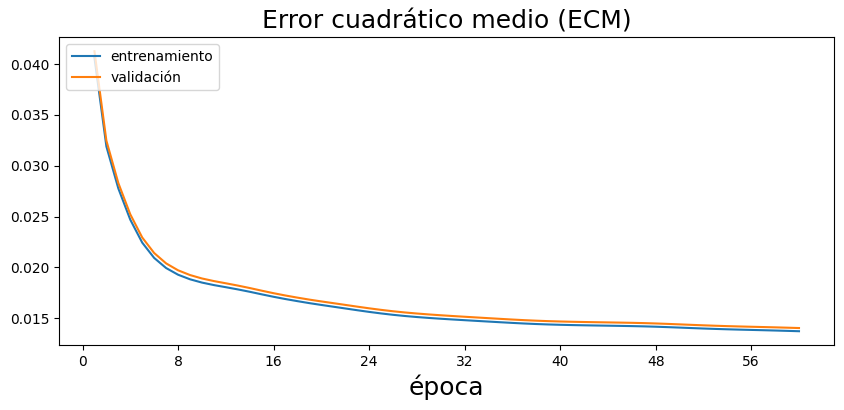

In [33]:
grafica_entrenamiento(acum_tr_loss, acum_val_loss, 'Error cuadrático medio (ECM)')

In [34]:
print("Valores finales del error cuadrático medio (ECM):")
print("  Training  : {:.3f}".format(((mlp.predict(X_tr)   - X_tr)  **2).mean()))
print("  Validación: {:.3f}".format(((mlp.predict(X_val)  - X_val) **2).mean()))
print("  Test      : {:.3f}".format(((mlp.predict(X_test) - X_test)**2).mean()))

Valores finales del error cuadrático medio (ECM):
  Training  : 0.014
  Validación: 0.014
  Test      : 0.014


In [35]:
min_wij = mlp.coefs_[0].min()
max_wij = mlp.coefs_[0].max()

print(min_wij)
print(max_wij)

-0.15691940710619445
0.16794634897377694


In [36]:
mlp.coefs_[0].shape # pesos de la capa de entrada a la capa oculta

(784, 50)

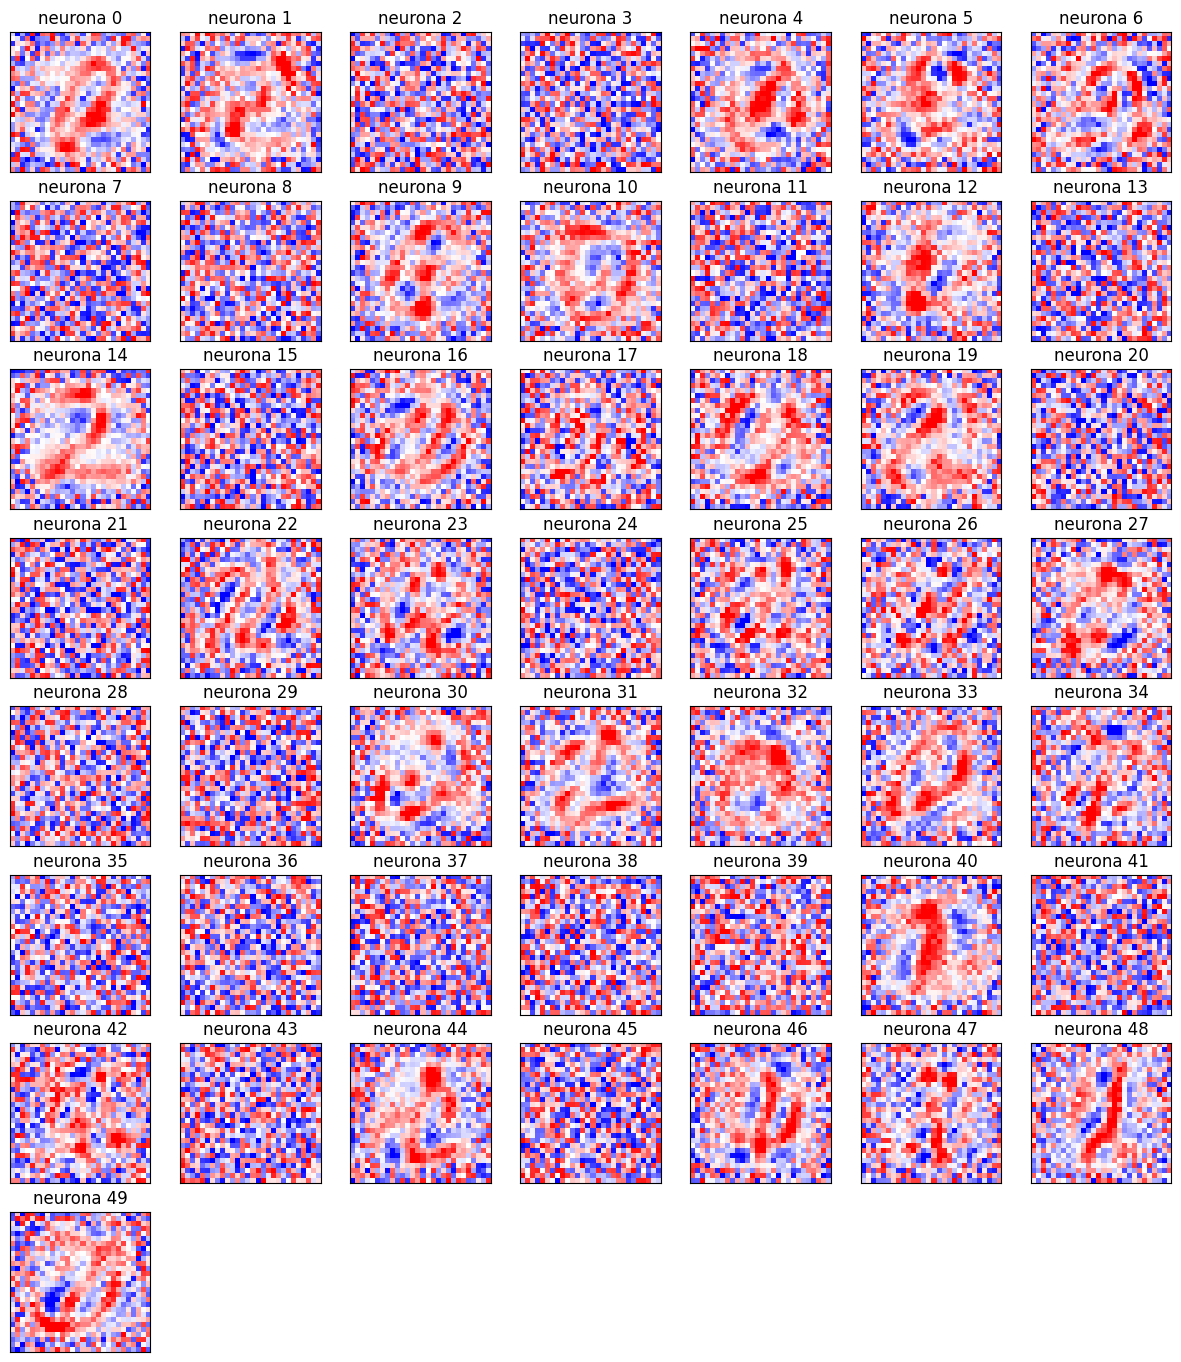

In [37]:
c = max([abs(min_wij), abs(max_wij)]) # factor de escala para visualización

ncols = 7 # número de columnas en la figura
nrows = int(np.ceil(n_hidden/ncols)) # número de filas en la figura
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15*nrows/ncols))
axes_r = axes.ravel()
for i in range(n_hidden):
    ax = axes_r[i]
    coefs = mlp.coefs_[0][:,i]
    # use global min / max to ensure all weights are shown on the same scale
    ax.imshow(coefs.reshape(28, 28), cmap=plt.cm.bwr, vmin=-.5*c, vmax=.5*c)
    ax.set_title("neurona {}".format(i))
    ax.set_xticks(())
    ax.set_yticks(())
for ax in axes_r[n_hidden:]:
    fig.delaxes(ax)

plt.show()


# **Predicciones**

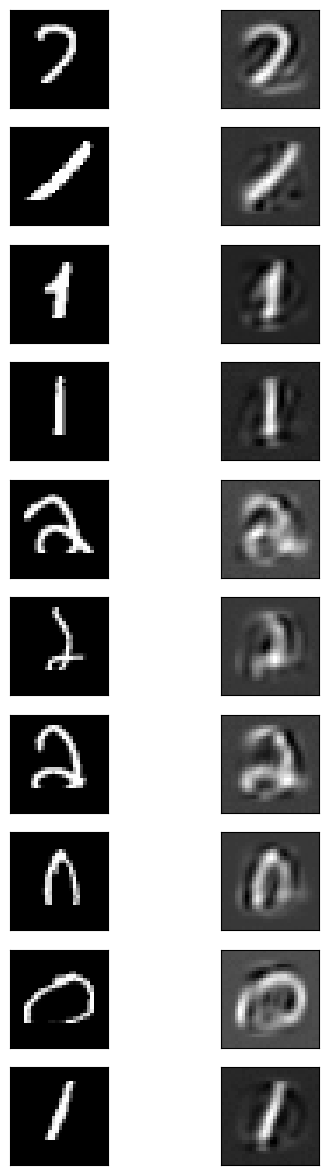

In [39]:
fig, axes = plt.subplots(10, 2, figsize=(5,15))
primero = 5000
for i in range(10):
    ax = axes.ravel()[2*i]
    patron = X_train_aux[primero+500*i].copy()
    patron[28*21:] = 0
    ax.matshow(patron.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

    ax = axes.ravel()[2*i+1]
    ax.matshow(mlp.predict([patron])[0].reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()